## Connect to a new SQLite database

In [24]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
import sqlite3

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

### Create a simple sales table

In [15]:
# Create a simple sales table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

## Insert some dummy data

In [22]:
sales_data = [
    ('Pen', 10, 5.0),
    ('Pen', 20, 5.0),
    ('Notebook', 5, 20.0),
    ('Notebook', 7, 20.0),
    ('Eraser', 30, 2.0),
    ('Marker', 15, 10.0),
    ('Marker', 10, 10.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)
conn.commit()

In [28]:
query = """
SELECT
    id , 
    product, 
    quantity, 
    price
FROM sales
"""

df = pd.read_sql_query(query, conn)
print(df)

    id   product  quantity  price
0    1       Pen        10    5.0
1    2       Pen        20    5.0
2    3  Notebook         5   20.0
3    4  Notebook         7   20.0
4    5    Eraser        30    2.0
5    6    Marker        15   10.0
6    7    Marker        10   10.0
7    8       Pen        10    5.0
8    9       Pen        20    5.0
9   10  Notebook         5   20.0
10  11  Notebook         7   20.0
11  12    Eraser        30    2.0
12  13    Marker        15   10.0
13  14    Marker        10   10.0
14  15       Pen        10    5.0
15  16       Pen        20    5.0
16  17  Notebook         5   20.0
17  18  Notebook         7   20.0
18  19    Eraser        30    2.0
19  20    Marker        15   10.0
20  21    Marker        10   10.0


Sales Summary:
     product  total_quantity  revenue
0    Eraser              90    180.0
1    Marker              75    750.0
2  Notebook              36    720.0
3       Pen              90    450.0


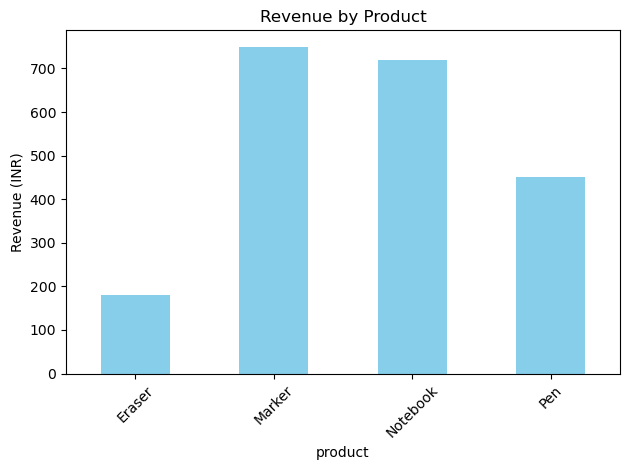

In [32]:
# SQL query: group by product, calculate total quantity and revenue
query = """
SELECT 
    product, 
    SUM(quantity) AS total_quantity, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn , index_col=None )

# Display table
print("Sales Summary:\n", df)

# Plot a bar chart of revenue by product
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.ylabel("Revenue (INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
plt.savefig("sales_chart.png")

<Figure size 640x480 with 0 Axes>